In [89]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from matplotlib.dates import DateFormatter


In [90]:
data_dir = '/Users/Karolina/ProjectsDataScience/data_science_environment/data/'
file_list = ['MyDataSpotify/StreamingHistory0.json',
             'MyDataSpotify/StreamingHistory1.json',
             'MyDataSpotify/StreamingHistory2.json',
             'MyDataSpotify/StreamingHistory3.json',
             'MyDataSpotify/StreamingHistory4.json']

dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(data_dir+file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [91]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-11-21 08:21,"Does It Offend You, Yeah?",We Are Rockstars,13744
1,2020-11-21 08:25,"Does It Offend You, Yeah?",With A Heavy Heart (I Regret To Inform You),256170
2,2020-11-21 08:27,"Does It Offend You, Yeah?",We Are Rockstars,69343
3,2020-11-21 08:30,"Does It Offend You, Yeah?",Doomed Now,221133
4,2020-11-21 08:31,"Does It Offend You, Yeah?",Being Bad Feels Pretty Good,2603


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47735 entries, 0 to 47734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     47735 non-null  object
 1   artistName  47735 non-null  object
 2   trackName   47735 non-null  object
 3   msPlayed    47735 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [93]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47735 entries, 0 to 47734
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                        
---  ------       --------------  -----                        
 0   endTime      47735 non-null  datetime64[ns]               
 1   artistName   47735 non-null  object                       
 2   trackName    47735 non-null  object                       
 3   msPlayed     47735 non-null  int64                        
 4   endTimeTz    47735 non-null  datetime64[ns, UTC]          
 5   endTimeTzEU  47735 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 2.2+ MB


In [94]:
df['hour'] = df.endTimeTzEU.dt.hour
df['date'] = df['endTime'].dt.to_period('D').apply(lambda r: r.start_time)
df['week'] = df['endTime'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['endTimeTzEU'].dt.to_period('M').apply(lambda r: r.start_time)


df['sPlayed'] = df['msPlayed']/(1000)
df['mPlayed'] = df['sPlayed']/(60)
df['hPlayed'] = df['sPlayed']/(60*60)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [95]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour,date,week,month,sPlayed,mPlayed,hPlayed
0,2020-11-21 08:21:00,"Does It Offend You, Yeah?",We Are Rockstars,13744,2020-11-21 08:21:00+00:00,2020-11-21 09:21:00+01:00,9,2020-11-21,2020-11-16,2020-11-01,13.744,0.229067,0.003818
1,2020-11-21 08:25:00,"Does It Offend You, Yeah?",With A Heavy Heart (I Regret To Inform You),256170,2020-11-21 08:25:00+00:00,2020-11-21 09:25:00+01:00,9,2020-11-21,2020-11-16,2020-11-01,256.170,4.269500,0.071158
2,2020-11-21 08:27:00,"Does It Offend You, Yeah?",We Are Rockstars,69343,2020-11-21 08:27:00+00:00,2020-11-21 09:27:00+01:00,9,2020-11-21,2020-11-16,2020-11-01,69.343,1.155717,0.019262
3,2020-11-21 08:30:00,"Does It Offend You, Yeah?",Doomed Now,221133,2020-11-21 08:30:00+00:00,2020-11-21 09:30:00+01:00,9,2020-11-21,2020-11-16,2020-11-01,221.133,3.685550,0.061426
4,2020-11-21 08:31:00,"Does It Offend You, Yeah?",Being Bad Feels Pretty Good,2603,2020-11-21 08:31:00+00:00,2020-11-21 09:31:00+01:00,9,2020-11-21,2020-11-16,2020-11-01,2.603,0.043383,0.000723


In [96]:
summ = pd.DataFrame(df.groupby(['date','hour'])['mPlayed'].sum().reset_index())
summ
avg = pd.DataFrame(summ.groupby('hour')['mPlayed'].mean())
avg

,mPlayed
hour,
0,19.652165
1,13.890713
2,17.194627
3,19.697700
4,16.330692
5,26.581344
6,16.561672
7,25.839818
8,31.165466


In [97]:
palette = sns.color_palette("YlGn", 24).as_hex() #RdYlBu



In [163]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=avg.mPlayed,
    theta=np.linspace(0, 360, 24, endpoint=False),
    width=15,
    marker_color=palette,
    marker_line_color='white',
    marker_line_width=0.10,
    #opacity=0.9,
    offset=0
))

num_slices=24
angular_tickvals = [(i) * 360 / num_slices for i in range(num_slices)]


labels = [time(i, 0).strftime("%H:%M") for i in avg.index]

fig.update_layout(
    title='<b>Spotify</b>: <i> Listening clock</i>',
    template=None,
    #polar_angularaxis_tickvals=angular_tickvals,
    polar = dict(
        bgcolor='#e5ecf6',
        radialaxis = dict(range=[0, 35], 
                          showticklabels=False,
                          #showgrid=False
                          ticks='', 
                          nticks=1,
                          color='grey', 
                          linewidth=0),
        angularaxis = dict(showticklabels=True, 
                           ticks='',
                           tickfont_size = 8,
                           tickfont_color = 'black',
                           rotation = 90,
                           direction = "clockwise",
                           color='white', 
                           tickmode='array',
                           tickvals=angular_tickvals,
                           ticktext=labels,
                           #tickcolor='yellow'
                           )
        
    )
)

fig.show()

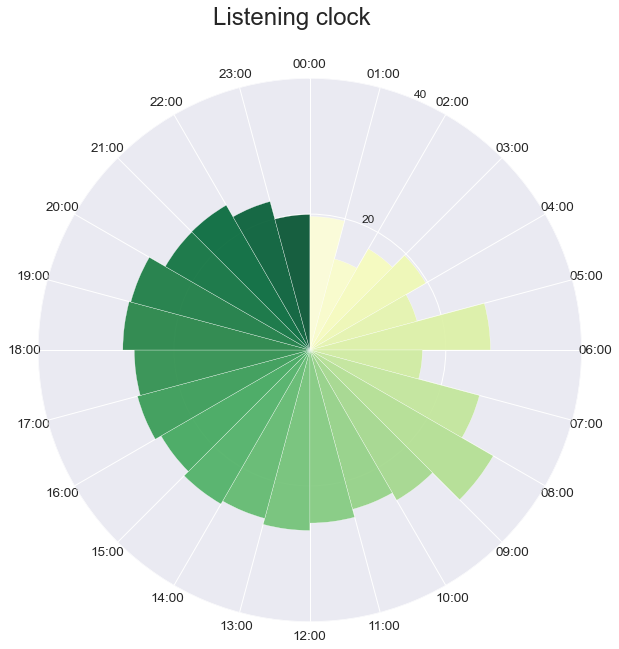

In [11]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("YlGn", 24) #RdYlBu
ax.bar(np.deg2rad(equals), avg.mPlayed, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([20,40], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()

In [12]:
summ = pd.DataFrame(df.groupby(['date','hour'])['trackName'].size().reset_index())
summ
avg = pd.DataFrame(summ.groupby('hour')['trackName'].mean())
avg

,trackName
hour,
0,11.179487
1,5.538462
2,6.125000
3,6.000000
4,5.000000
5,9.666667
6,9.156250
7,13.351351
8,13.635338


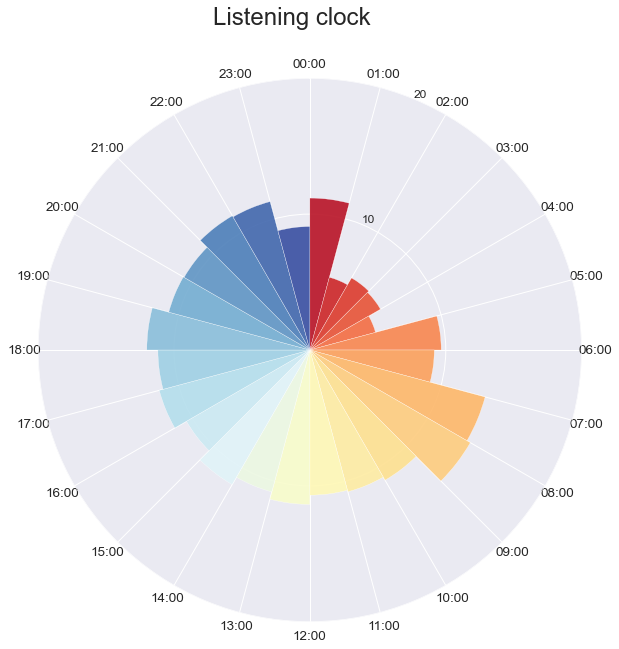

In [13]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("RdYlBu", 24)
ax.bar(np.deg2rad(equals), avg.trackName, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([10,20], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()

In [14]:
avg = pd.DataFrame(df.groupby('hour')['trackName'].size())
avg

,trackName
hour,
0,436
1,72
2,49
3,30
4,20
5,29
6,586
7,2470
8,3627


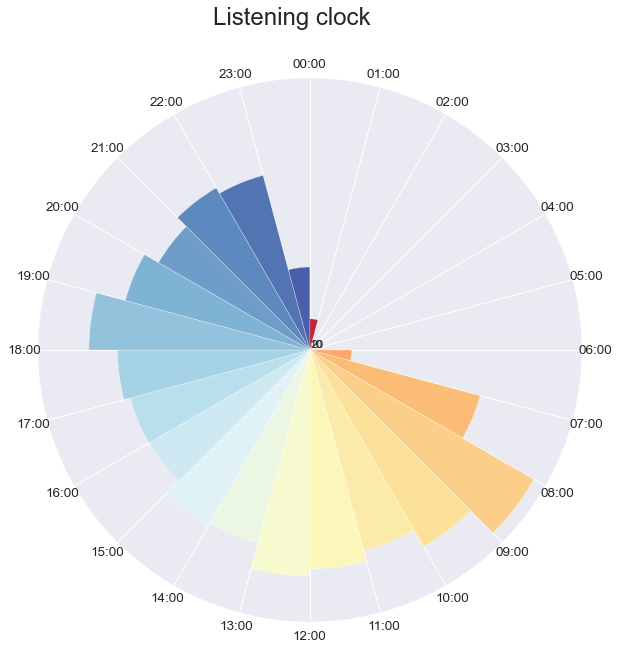

In [15]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("RdYlBu", 24)
ax.bar(np.deg2rad(equals), avg.trackName, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([10,20], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()